 The best solution found:                                                                           
 [1. 0. 1. 0. 1. 0. 0. 0.]

 Objective function:
 1370.0


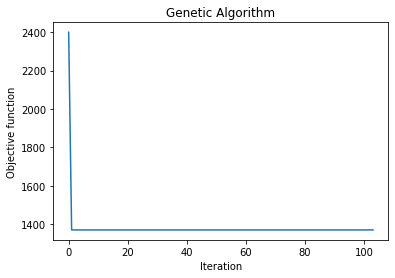



All Paths:
   node_from  node_to  distance  activated
0          1        2       220          1
1          1        3      1500          0
2          2        4       650          1
3          2        5       900          0
4          4        7       500          1
5          5        7       400          0
6          3        6       500          0
7          6        7       400          0

Selected Paths:
   node_from  node_to  distance  activated
0          1        2       220          1
2          2        4       650          1
4          4        7       500          1

Total path: 1370.0


In [1]:
import pandas as pd, numpy as np
from geneticalgorithm import geneticalgorithm as ga
from io import StringIO
 
#inputs
#nodes = pd.read_excel('route_inputs.xlsx', sheet_name='nodes')
#paths = pd.read_excel('route_inputs.xlsx', sheet_name='paths')

nodes_str = """node	description
1	origin
2	middle point
3	middle point
4	middle point
5	middle point
6	middle point
7	destination
"""

paths_str = """node_from	node_to	distance
1	2	220
1	3	1500
2	4	650
2	5	900
4	7	500
5	7	400
3	6	500
6	7	400
"""

nodes = pd.read_csv(StringIO(nodes_str), sep="\t")
paths = pd.read_csv(StringIO(paths_str), sep="\t")

nVars = len(paths)
 
#fitness function
def f(x):
    pen = 0
    
    #constraint sum(x) == 1 (origin)
    node_origin = int(nodes.node[nodes.description=='origin'])
    if sum([x[p] for p in paths.index[paths.node_from==node_origin]]) != 1:
        pen += 1000000 * np.abs(sum([x[p] for p in paths.index[paths.node_from==node_origin]]) - 1)
    
    #constraint sum(x) == 1 (destination)
    node_destination = int(nodes.node[nodes.description=='destination'])
    if sum([x[p] for p in paths.index[paths.node_to==node_destination]]) != 1:
        pen += 1000000 * np.abs(sum([x[p] for p in paths.index[paths.node_to==node_destination]]) - 1)
    
    #constraint sum(x, in) == sum(x, out)
    for node in nodes.node[nodes.description=='middle point']:
        sum_in = sum([x[p] for p in paths.index[paths.node_to==node]])
        sum_out = sum([x[p] for p in paths.index[paths.node_from==node]])
        if sum_in != sum_out:
            pen += 1000000 * np.abs(sum_in - sum_out)
 
    #objective function and return
    objFun = sum([x[p] * paths.distance[p] for p in paths.index])
    return objFun + pen
 
#bounds and var type
varbounds = np.array([[0,1]]*nVars)
vartype = np.array([['int']]*nVars)
 
#GA parameters
algorithm_param = {'max_num_iteration': 500,\
                   'population_size':100,\
                   'mutation_probability':0.30,\
                   'elit_ratio': 0.10,\
                   'crossover_probability': 0.50,\
                   'parents_portion': 0.30,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':100}
 
#Solve
model = ga(function=f,
           dimension=nVars,
           variable_type_mixed=vartype,
           variable_boundaries=varbounds,
           algorithm_parameters=algorithm_param)
model.run()
 
#print
x = model.best_variable
objFun = model.best_function
paths['activated'] = 0
for p in paths.index:
    paths.activated[p] = x[p]
 
print('\n\nAll Paths:')
print(paths)
 
print('\nSelected Paths:')
print(paths[paths.activated==1])
 
print('\nTotal path:', objFun)

 The best solution found:                                                                           
 [1. 0. 1. 0. 1. 0. 0. 0.]

 Objective function:
 1370.0


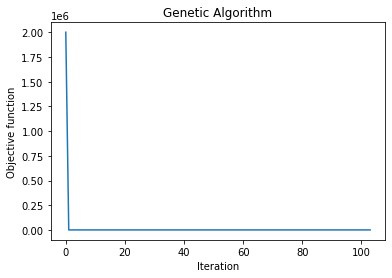

In [2]:
%%time
model.run()